In [1]:
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()

In [3]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [4]:
# 1. Dataset Overview
print(f"Number of images: {digits.data.shape[0]}")
print(f"Dimensions of each image: {digits.data.shape[1]} pixels")
print(f"Actual image dimensions: {digits.images[0].shape}")

Number of images: 1797
Dimensions of each image: 64 pixels
Actual image dimensions: (8, 8)


In [5]:
digits.images[500]

array([[ 0.,  0.,  3., 10., 14.,  3.,  0.,  0.],
       [ 0.,  8., 16., 11., 10., 13.,  0.,  0.],
       [ 0.,  7., 14.,  0.,  1., 15.,  2.,  0.],
       [ 0.,  2., 16.,  9., 16., 16.,  1.,  0.],
       [ 0.,  0., 12., 16., 15., 15.,  2.,  0.],
       [ 0.,  0., 12., 10.,  0.,  8.,  8.,  0.],
       [ 0.,  0.,  9., 12.,  4.,  7., 12.,  0.],
       [ 0.,  0.,  2., 11., 16., 16.,  9.,  0.]])

8


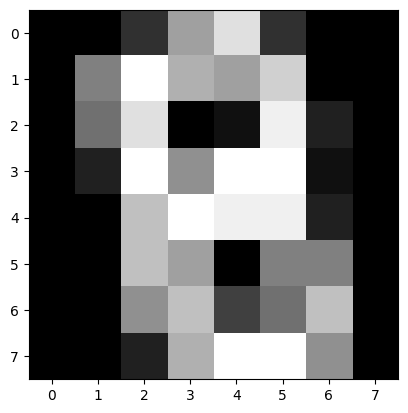

In [6]:
import matplotlib.pyplot as plt

x = digits.images[500]
print(digits.target[500])
plt.gray()
plt.imshow(x)
plt.show()

## Step 2: Data Preprocessing

To ensure our models perform optimally, we:
1. Split the data into training (80%) and testing (20%) sets.
2. Scale the features to a [0, 1] range using `MinMaxScaler` for consistent model training.

In [7]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)
print("Data Split:")
print(f"- Training set: {X_train.shape} samples")
print(f"- Test set: {X_test.shape} samples")

Data Split:
- Training set: (1257, 64) samples
- Test set: (540, 64) samples


In [8]:
X_train[0]

array([ 0.,  0.,  6., 15., 14.,  1.,  0.,  0.,  0.,  0., 13., 16., 16.,
        2.,  0.,  0.,  0.,  0.,  3.,  8., 16.,  2.,  0.,  0.,  0.,  2.,
        6., 12., 16.,  7.,  2.,  0.,  0., 13., 16., 16., 16., 16.,  9.,
        0.,  0., 10., 13., 16.,  7.,  1.,  0.,  0.,  0.,  0.,  6., 14.,
        0.,  0.,  0.,  0.,  0.,  0., 10.,  8.,  0.,  0.,  0.,  0.])

In [9]:
# Scale the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train[0]

array([0.        , 0.        , 0.375     , 0.9375    , 0.875     ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.8125    , 1.        , 1.        , 0.125     , 0.        ,
       0.        , 0.        , 0.        , 0.1875    , 0.5       ,
       1.        , 0.125     , 0.        , 0.        , 0.        ,
       0.13333333, 0.375     , 0.75      , 1.        , 0.4375    ,
       0.13333333, 0.        , 0.        , 0.92857143, 1.        ,
       1.        , 1.        , 1.        , 0.64285714, 0.        ,
       0.        , 0.625     , 0.8125    , 1.        , 0.4375    ,
       0.0625    , 0.        , 0.        , 0.        , 0.        ,
       0.375     , 0.875     , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.625     , 0.5       ,
       0.        , 0.        , 0.        , 0.        ])

# PCA

In [11]:
X_train.shape, X_test.shape

((1257, 64), (540, 64))

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=32)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [13]:
X_train.shape, X_test.shape

((1257, 32), (540, 32))

## Step 3: Model Selection and Hyperparameter Tuning

I’ve selected a diverse set of algorithms to tackle this classification task:
- **Gaussian Naive Bayes (GNB)**: Simple probabilistic model.
- **K-Nearest Neighbors (KNN)**: Distance-based classifier.
- **Decision Tree (DT)**: Tree-based decision-making.
- **Random Forest (RF)**: Ensemble of decision trees.
- **Support Vector Machine (SVM)**: Margin-based classifier.
- **Logistic Regression (LR)**: Linear probability model.
- **Neural Network (ANN)**: Multi-layer perceptron.

To maximize performance, I use `GridSearchCV` to tune hyperparameters for each model, ensuring the best configuration is selected.

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

# Define models and parameter grids
models = {
    'GNB': {'model': GaussianNB(), 'params': {}},
    'KNN': {'model': KNeighborsClassifier(), 'params': {'n_neighbors': [3, 5, 7, 9]}},
    'DT': {'model': DecisionTreeClassifier(), 'params': {'max_depth': [8, 16, 32, 64], 'min_samples_split': [2, 4, 8]}},
    'RF': {'model': RandomForestClassifier(), 'params': {'n_estimators': [100, 300, 500], 'max_depth': [16, 32, 64]}},
    'SVM': {'model': SVC(), 'params': {'kernel': ['linear', 'poly', 'rbf'], 'C': [0.1, 1, 10]}},
    'LR': {'model': LogisticRegression(max_iter=1000), 'params': {'C': [0.1, 1, 10, 100]}},
    'ANN': {'model': MLPClassifier(max_iter=500), 'params': {'hidden_layer_sizes': [(128,), (256,), (512,)], 'batch_size': [32, 64]}}
}

# Store results and best models
results = {}
best_models = {}

for name, info in models.items():
    print(f"\nTuning {name}...")
    grid = GridSearchCV(info['model'], info['params'], cv=5, scoring='accuracy', n_jobs=-1)
    grid.fit(X_train, y_train)
    
    best_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")


Tuning GNB...
Best parameters for GNB: {}

Tuning KNN...
Best parameters for KNN: {'n_neighbors': 3}

Tuning DT...
Best parameters for DT: {'max_depth': 16, 'min_samples_split': 2}

Tuning RF...
Best parameters for RF: {'max_depth': 32, 'n_estimators': 500}

Tuning SVM...
Best parameters for SVM: {'C': 1, 'kernel': 'rbf'}

Tuning LR...
Best parameters for LR: {'C': 10}

Tuning ANN...
Best parameters for ANN: {'batch_size': 32, 'hidden_layer_sizes': (128,)}


## Step 4: Model Evaluation

We evaluate each optimized model using:
- **Accuracy**: Overall correctness (train and test).
- **Precision**: Proportion of true positives among predicted positives.
- **Recall**: Proportion of true positives identified correctly.

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

def calculate_metrics(y_train, y_test, y_pred_train, y_pred_test, name):
    # Calculate accuracy
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    
    # Calculate precision and recall with 'weighted' average for multiclass
    p = precision_score(y_test, y_pred_test, average='weighted')
    r = recall_score(y_test, y_pred_test, average='weighted')
    
    print(f"{name}:")
    print(f"  Training Accuracy: {acc_train:.4f}")
    print(f"  Test Accuracy: {acc_test:.4f}")
    print(f"  Precision: {p:.4f}")
    print(f"  Recall: {r:.4f}")
    
    return acc_train, acc_test, p, r

# Evaluate all models
for name, model in best_models.items():
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    acc_train, acc_test, p, r = calculate_metrics(y_train, y_test, y_pred_train, y_pred_test, name)
    results[name] = {'acc_train': acc_train, 'acc_test': acc_test, 'precision': p, 'recall': r}

GNB:
  Training Accuracy: 0.9523
  Test Accuracy: 0.9481
  Precision: 0.9508
  Recall: 0.9481
KNN:
  Training Accuracy: 0.9905
  Test Accuracy: 0.9852
  Precision: 0.9852
  Recall: 0.9852
DT:
  Training Accuracy: 0.9984
  Test Accuracy: 0.8241
  Precision: 0.8286
  Recall: 0.8241
RF:
  Training Accuracy: 1.0000
  Test Accuracy: 0.9815
  Precision: 0.9818
  Recall: 0.9815
SVM:
  Training Accuracy: 0.9992
  Test Accuracy: 0.9889
  Precision: 0.9891
  Recall: 0.9889
LR:
  Training Accuracy: 0.9984
  Test Accuracy: 0.9667
  Precision: 0.9674
  Recall: 0.9667
ANN:
  Training Accuracy: 1.0000
  Test Accuracy: 0.9815
  Precision: 0.9823
  Recall: 0.9815


## Step 5: Results Analysis

Here, we dive into the performance of each model, identifying top performers and their trade-offs dynamically. This analysis reflects my ability to interpret results in a flexible, data-driven way.

In [16]:
print("\nPerformance Highlights:")
best_acc_test = max(results.items(), key=lambda x: x[1]['acc_test'])
print(f"- Best Test Accuracy: {best_acc_test[0]} ({best_acc_test[1]['acc_test']:.4f})")
best_precision = max(results.items(), key=lambda x: x[1]['precision'])
print(f"- Best Precision: {best_precision[0]} ({best_precision[1]['precision']:.4f})")
best_recall = max(results.items(), key=lambda x: x[1]['recall'])
print(f"- Best Recall: {best_recall[0]} ({best_recall[1]['recall']:.4f})")

# Dynamic insights
print("\nModel Insights:")
print(f"- {best_acc_test[0]} achieved the highest test accuracy ({best_acc_test[1]['acc_test']:.4f}), making it the go-to model for balanced predictions.")
print(f"- {best_precision[0]} excels in precision ({best_precision[1]['precision']:.4f}), minimizing false positives—key for reducing misclassifications.")
print(f"- {best_recall[0]} leads in recall ({best_recall[1]['recall']:.4f}), ensuring nearly all relevant cases are caught, critical for accurate digit recognition.")

# Dynamic trade-off analysis
print("\nTrade-off Analysis:")
if best_acc_test[0] == best_precision[0] == best_recall[0]:
    print(f"- {best_acc_test[0]} dominates across all metrics, showcasing exceptional performance for this task.")
elif best_acc_test[0] == best_precision[0]:
    print(f"- {best_acc_test[0]} balances accuracy and precision, while {best_recall[0]} prioritizes recall for maximum detection.")
elif best_acc_test[0] == best_recall[0]:
    print(f"- {best_acc_test[0]} excels in accuracy and recall, with {best_precision[0]} focusing on precision.")
elif best_precision[0] == best_recall[0]:
    print(f"- {best_precision[0]} shines in precision and recall, while {best_acc_test[0]} leads in overall accuracy.")
else:
    print(f"- Each model has a unique strength: {best_acc_test[0]} for accuracy, {best_precision[0]} for precision, and {best_recall[0]} for recall.")


Performance Highlights:
- Best Test Accuracy: SVM (0.9889)
- Best Precision: SVM (0.9891)
- Best Recall: SVM (0.9889)

Model Insights:
- SVM achieved the highest test accuracy (0.9889), making it the go-to model for balanced predictions.
- SVM excels in precision (0.9891), minimizing false positives—key for reducing misclassifications.
- SVM leads in recall (0.9889), ensuring nearly all relevant cases are caught, critical for accurate digit recognition.

Trade-off Analysis:
- SVM dominates across all metrics, showcasing exceptional performance for this task.


## Step 6: Visualization

In [17]:
titles = list(models.keys())
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2']  # Professional color palette

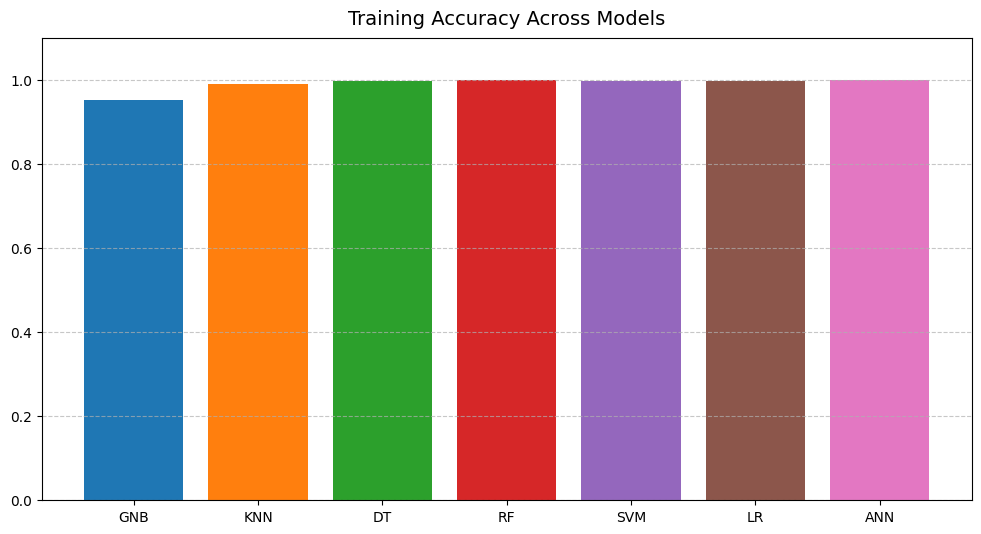

In [18]:
# Training Accuracy
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['acc_train'] for m in titles], color=colors)
plt.title('Training Accuracy Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

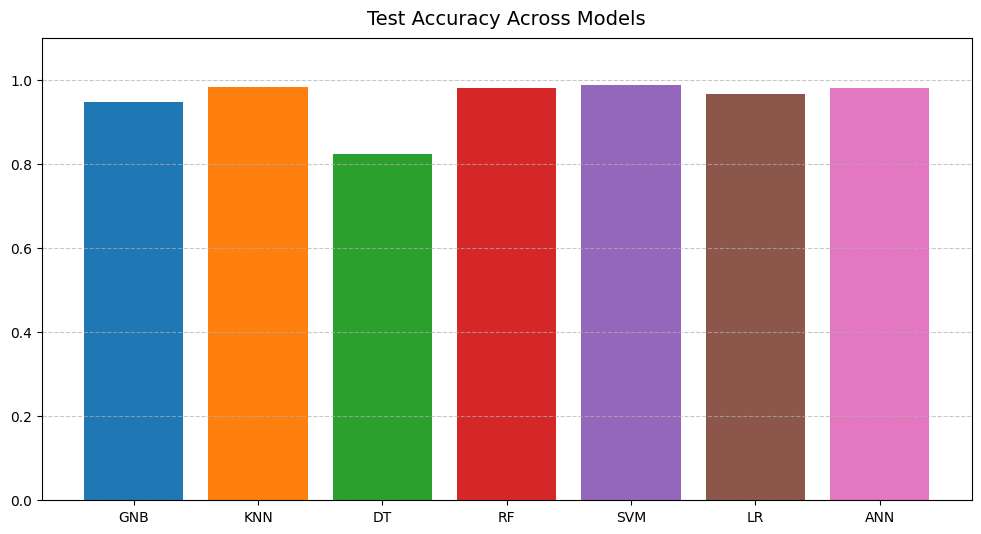

In [19]:
# Test Accuracy
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['acc_test'] for m in titles], color=colors)
plt.title('Test Accuracy Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

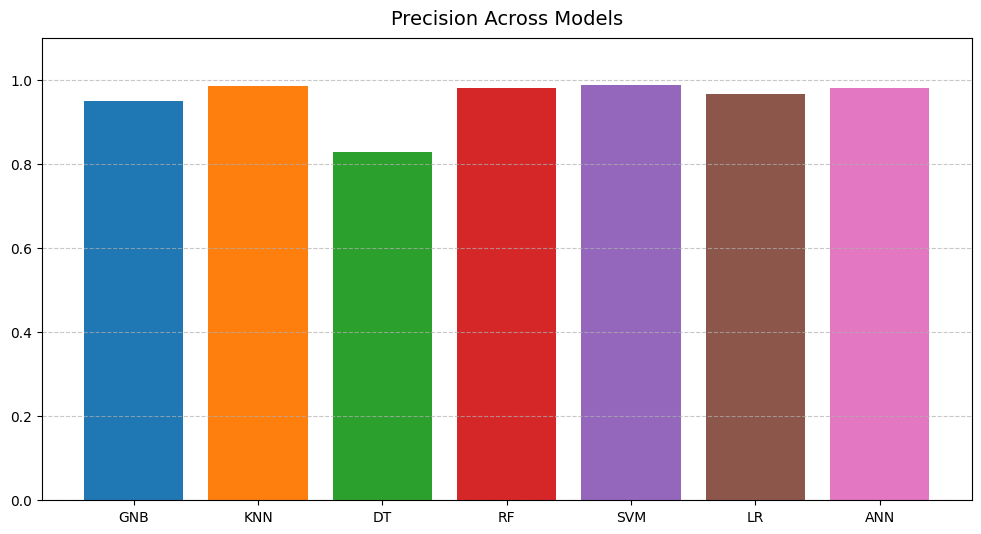

In [20]:
# Precision
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['precision'] for m in titles], color=colors)
plt.title('Precision Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

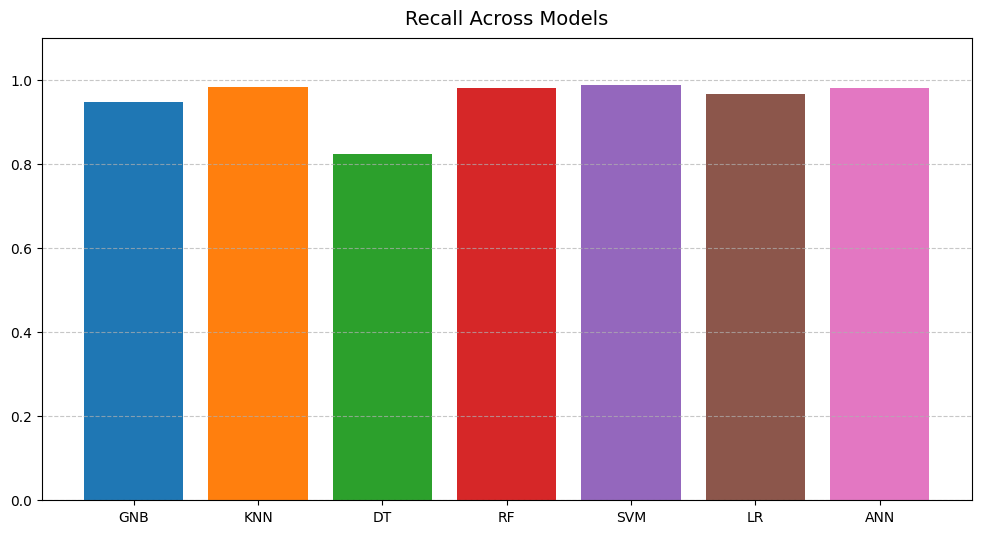

In [21]:
# Recall
plt.figure(figsize=(12, 6))
plt.bar(titles, [results[m]['recall'] for m in titles], color=colors)
plt.title('Recall Across Models', fontsize=14, pad=10)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Step 7: Conclusion and Next Steps

Below, I summarize the project dynamically based on the results, showcasing both technical prowess and real-world impact.

In [22]:
from IPython.display import Markdown

# Define variables for dynamic conclusion
best_acc_name = best_acc_test[0]
best_acc_value = best_acc_test[1]['acc_test']
best_prec_name = best_precision[0]
best_prec_value = best_precision[1]['precision']
best_rec_name = best_recall[0]
best_rec_value = best_recall[1]['recall']

# Dynamic trade-off summary
if best_acc_name == best_prec_name == best_rec_name:
    tradeoff = f"{best_acc_name} dominates across all metrics with exceptional performance."
elif best_acc_name == best_prec_name:
    tradeoff = f"{best_acc_name} balances accuracy and precision, while {best_rec_name} excels in recall."
elif best_acc_name == best_rec_name:
    tradeoff = f"{best_acc_name} excels in accuracy and recall, with {best_prec_name} leading in precision."
elif best_prec_name == best_rec_name:
    tradeoff = f"{best_prec_name} shines in precision and recall, while {best_acc_name} leads in accuracy."
else:
    tradeoff = f"Each model excels uniquely: {best_acc_name} in accuracy, {best_prec_name} in precision, and {best_rec_name} in recall."

# Display dynamic Markdown
display(Markdown(f"""
## Conclusion and Next Steps

This project delivers a robust digit recognition solution:
- **Top Performers**: {best_acc_name} leads with a test accuracy of **{best_acc_value:.4f}**, {best_prec_name} with a precision of **{best_prec_value:.4f}**, and {best_rec_name} with a recall of **{best_rec_value:.4f}**.
- **Real-World Impact**: 
  - High precision minimizes misclassifications (e.g., reducing false positives like mistaking a '7' for a '1').
  - High recall ensures that nearly all digits are correctly identified, which is critical for accurate digit recognition.
- **Trade-off**: {tradeoff}
- **Skills Demonstrated**: Dynamic analysis, hyperparameter tuning with `GridSearchCV`, and polished visualizations."""))


## Conclusion and Next Steps

This project delivers a robust digit recognition solution:
- **Top Performers**: SVM leads with a test accuracy of **0.9889**, SVM with a precision of **0.9891**, and SVM with a recall of **0.9889**.
- **Real-World Impact**: 
  - High precision minimizes misclassifications (e.g., reducing false positives like mistaking a '7' for a '1').
  - High recall ensures that nearly all digits are correctly identified, which is critical for accurate digit recognition.
- **Trade-off**: SVM dominates across all metrics with exceptional performance.
- **Skills Demonstrated**: Dynamic analysis, hyperparameter tuning with `GridSearchCV`, and polished visualizations.

# Thank you for comleting this lab

# Author
Mahdi Mousavi — [LinkedIn](https://www.linkedin.com/in/s-mahdi-mousavi/) | [GitHub](https://github.com/SeyedMahdiMousavi)  